In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
nifty=pd.read_csv('nifty.csv')
tata=pd.read_csv('TATAMOTORS.csv')

#### Check for NaN values

In [3]:
nifty.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
tata.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###### Daily Returns = % change in close price

In [44]:
tata_returns=tata['Close'].pct_change()
nifty_returns=nifty['Close'].pct_change()

In [45]:
tata['Returns']=tata_returns
nifty['Returns']=nifty_returns

In [46]:
tata.dropna(inplace=True)
nifty.dropna(inplace=True)

###### beta is calculated by dividing the covariance of the security's returns and the market's returns by the variance of the market's returns over a specified period.

In [47]:
df_returns=pd.DataFrame()
df_returns['Tata']=list(tata['Returns'])
df_returns['Nifty']=list(nifty['Returns'])

In [48]:
cov_matrix=df_returns.cov()

In [49]:
cov_matrix

,Tata,Nifty
Tata,0.000227,0.000043
Nifty,0.000043,0.000039


In [50]:
covariance=cov_matrix['Tata'][1]
nifty_variance=cov_matrix['Nifty'][1]

In [51]:
beta=covariance/nifty_variance

In [52]:
beta

1.1007792310760245

### Beta = 1.1

###### Now we need to find daily risk free return

In [53]:
risk_free_rate=7.015/100

In [54]:
num_days=len(nifty)

In [55]:
Rf=(1+risk_free_rate)**(1/num_days)-1

In [56]:
Rf

0.00028136250265919927

##### Alpha = R – Rf – beta (Rm-Rf)
##### R: Asset return, Rm: market return

In [57]:
R=tata['Returns'].mean()
Rm=nifty['Returns'].mean()

In [58]:
alpha=R-Rf-beta*(Rm-Rf)

In [59]:
alpha

0.0025322711929178857

### Alpha = 0.0025

##### Sharpe Ratio

##### 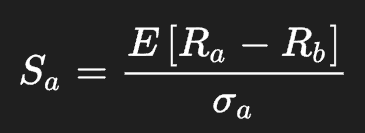

###### Ra: Asset Return
###### Rb: Riskfree Return

In [60]:
tata_sharpe=(tata['Returns'].mean()-Rf)/(tata['Returns'].std())
nifty_sharpe=(nifty['Returns'].mean()-Rf)/(nifty['Returns'].std())

In [61]:
tata_sharpe

0.22198412610042295

In [62]:
nifty_sharpe

0.11805792987728883

In [71]:
def max_drawdown(share):
    prices=np.array(share['Close'])
    max_prices=np.maximum.accumulate(prices)
    drawdown=np.abs((prices-max_prices)/(max_prices))
    return max(list(drawdown))*100

In [72]:
tata_drawdown=max_drawdown(tata)
nifty_drawdown=max_drawdown(nifty)

In [73]:
tata_drawdown

9.511212579573344

In [74]:
nifty_drawdown

6.611908147652758

### MDD of Tata Motors is 9.5 %
### MDD of Nifty is 6.6 &